Import stuffs

In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import tensorflow as tf

Initialize path

In [2]:
path = "D:\Code\Python\LipReading\data" # Change to desired data path
path

'D:\\Code\\Python\\LipReading\\data'

Video paths

In [17]:
person_vids = []
for i in range(1):
    temp = "s" + str(i+1)
    temp = os.path.join(path, temp)
    person_vids.append(temp)
person_vids

['D:\\Code\\Python\\LipReading\\data\\s1']

In [18]:
extension = "mpg"
vid_paths = []
for person_vid in person_vids:
    file_list = os.listdir(person_vid)
    for file in file_list:
        if file.split(".")[-1] == extension:
            vid_path = os.path.join(person_vid, file)
            vid_paths.append(vid_path)
vid_paths[:5]

['D:\\Code\\Python\\LipReading\\data\\s1\\bbaf2n.mpg',
 'D:\\Code\\Python\\LipReading\\data\\s1\\bbaf3s.mpg',
 'D:\\Code\\Python\\LipReading\\data\\s1\\bbaf4p.mpg',
 'D:\\Code\\Python\\LipReading\\data\\s1\\bbaf5a.mpg',
 'D:\\Code\\Python\\LipReading\\data\\s1\\bbal6n.mpg']

In [5]:
len(vid_paths)

1000

In [6]:
vid_paths.index('D:\\Code\\Python\\LipReading\\data\\s1\\bbizzn.mpg')

45

Alignments paths

In [7]:
alignments_path = os.path.join(path, "alignments")
alignments_path

'D:\\Code\\Python\\LipReading\\data\\alignments'

In [8]:
person_aligns = []
for i in range(1):
    temp = "s" + str(i+1)
    temp = os.path.join(alignments_path, temp)
    person_aligns.append(temp)
person_aligns

['D:\\Code\\Python\\LipReading\\data\\alignments\\s1']

In [9]:
extension = "align"
align_paths = []
for person_align in person_aligns:
    file_list = os.listdir(person_align)
    for file in file_list:
        if file.split(".")[-1] == extension:
            align_path = os.path.join(person_align, file)
            align_paths.append(align_path)
align_paths[:5]

['D:\\Code\\Python\\LipReading\\data\\alignments\\s1\\bbaf2n.align',
 'D:\\Code\\Python\\LipReading\\data\\alignments\\s1\\bbaf3s.align',
 'D:\\Code\\Python\\LipReading\\data\\alignments\\s1\\bbaf4p.align',
 'D:\\Code\\Python\\LipReading\\data\\alignments\\s1\\bbaf5a.align',
 'D:\\Code\\Python\\LipReading\\data\\alignments\\s1\\bbal6n.align']

In [76]:
align_paths.index('D:\\Code\\Python\\LipReading\\data\\alignments\\s1\\pbio7a.align')

531

Test if both paths aligned

In [15]:
vid_test_paths= []
for vid_path in vid_paths:
    temp = vid_path.split('\\')
    vid_test_paths.append(temp[-1].split('.'))
vid_test_paths

[['bbaf2n', 'mpg'],
 ['bbaf3s', 'mpg'],
 ['bbaf4p', 'mpg'],
 ['bbaf5a', 'mpg'],
 ['bbal6n', 'mpg'],
 ['bbal7s', 'mpg'],
 ['bbal8p', 'mpg'],
 ['bbal9a', 'mpg'],
 ['bbas1s', 'mpg'],
 ['bbas2p', 'mpg'],
 ['bbas3a', 'mpg'],
 ['bbaszn', 'mpg'],
 ['bbaz4n', 'mpg'],
 ['bbaz5s', 'mpg'],
 ['bbaz6p', 'mpg'],
 ['bbaz7a', 'mpg'],
 ['bbbf6n', 'mpg'],
 ['bbbf7s', 'mpg'],
 ['bbbf8p', 'mpg'],
 ['bbbf9a', 'mpg'],
 ['bbbm1s', 'mpg'],
 ['bbbm2p', 'mpg'],
 ['bbbm3a', 'mpg'],
 ['bbbmzn', 'mpg'],
 ['bbbs4n', 'mpg'],
 ['bbbs5s', 'mpg'],
 ['bbbs6p', 'mpg'],
 ['bbbs7a', 'mpg'],
 ['bbbz8n', 'mpg'],
 ['bbbz9s', 'mpg'],
 ['bbie8n', 'mpg'],
 ['bbie9s', 'mpg'],
 ['bbif1a', 'mpg'],
 ['bbifzp', 'mpg'],
 ['bbil2n', 'mpg'],
 ['bbil3s', 'mpg'],
 ['bbil4p', 'mpg'],
 ['bbil5a', 'mpg'],
 ['bbir6n', 'mpg'],
 ['bbir7s', 'mpg'],
 ['bbir8p', 'mpg'],
 ['bbir9a', 'mpg'],
 ['bbiz1s', 'mpg'],
 ['bbiz2p', 'mpg'],
 ['bbiz3a', 'mpg'],
 ['bbizzn', 'mpg'],
 ['bbwg1s', 'mpg'],
 ['bbwg2p', 'mpg'],
 ['bbwg3a', 'mpg'],
 ['bbwgzn', 'mpg'],


In [21]:
align_test_paths = []
for align_path in align_paths:
    temp = align_path.split('\\')
    align_test_paths.append(temp[-1].split('.'))
align_test_paths

[['bbaf2n', 'align'],
 ['bbaf3s', 'align'],
 ['bbaf4p', 'align'],
 ['bbaf5a', 'align'],
 ['bbal6n', 'align'],
 ['bbal7s', 'align'],
 ['bbal8p', 'align'],
 ['bbal9a', 'align'],
 ['bbas1s', 'align'],
 ['bbas2p', 'align'],
 ['bbas3a', 'align'],
 ['bbaszn', 'align'],
 ['bbaz4n', 'align'],
 ['bbaz5s', 'align'],
 ['bbaz6p', 'align'],
 ['bbaz7a', 'align'],
 ['bbbf6n', 'align'],
 ['bbbf7s', 'align'],
 ['bbbf8p', 'align'],
 ['bbbf9a', 'align'],
 ['bbbm1s', 'align'],
 ['bbbm2p', 'align'],
 ['bbbm3a', 'align'],
 ['bbbmzn', 'align'],
 ['bbbs4n', 'align'],
 ['bbbs5s', 'align'],
 ['bbbs6p', 'align'],
 ['bbbs7a', 'align'],
 ['bbbz8n', 'align'],
 ['bbbz9s', 'align'],
 ['bbie8n', 'align'],
 ['bbie9s', 'align'],
 ['bbif1a', 'align'],
 ['bbifzp', 'align'],
 ['bbil2n', 'align'],
 ['bbil3s', 'align'],
 ['bbil4p', 'align'],
 ['bbil5a', 'align'],
 ['bbir6n', 'align'],
 ['bbir7s', 'align'],
 ['bbir8p', 'align'],
 ['bbir9a', 'align'],
 ['bbiz1s', 'align'],
 ['bbiz2p', 'align'],
 ['bbiz3a', 'align'],
 ['bbizzn'

In [25]:
bool = True
for i in range(len(vid_test_paths)):
    if vid_test_paths[i][0] != align_test_paths[i][0]:
        bool = False
print(bool)

True


Load videos

In [21]:
import mediapipe as mp

# Initialize Mediapipe Face Detection
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils 
face_detection = mp_face_detection.FaceDetection(min_detection_confidence=0.5)

In [36]:
vid_1 = []
cap = cv2.VideoCapture(vid_paths[0])
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    vid_1.append(frame)

vid_1 = np.array(vid_1)
vid_1.shape

(75, 288, 360, 3)

In [6]:
vid_indices = []
count = 0
for vid_path in vid_paths:
    cap = cv2.VideoCapture(vid_path)
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        count += 1
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    if total_frames < 75:
        vid_indices.append(vid_path)
vid_indices

[]

In [7]:
count

75000

In [107]:
vid_paths[4]

'D:\\Code\\Python\\LipReading\\data\\s1\\bbal6n.mpg'

In [13]:
test_frames = []

cap = cv2.VideoCapture(vid_paths[0])

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
            break
    frame = cv2.flip(frame, 1)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    test_frames.append(frame)
cap.release()
len(test_frames)

75

In [31]:
s1_frames = []
for vid_path in vid_paths:
    print(len(s1_frames))
    if vid_path == 'D:\\Code\\Python\\LipReading\\data\\s1\\pbio7a.mpg' or vid_path == 'D:\\Code\\Python\\LipReading\\data\\s1\\bbizzn.mpg':
        continue
    frames = []
    cap = cv2.VideoCapture(vid_path)
    # if vid_path == 'D:\\Code\\Python\\LipReading\\data\\s1\\bbizzn.mpg':
    #     cap.set(cv2.CAP_PROP_POS_FRAMES, 12)
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = face_detection.process(frame)
    if results.detections:
        detection = results.detections[0]
        bboxC = detection.location_data.relative_bounding_box
        ih, iw, _ = frame.shape
        x, y, w, h = int(bboxC.xmin*iw), int(bboxC.ymin*ih), int(bboxC.width*iw), int(bboxC.height*ih)
        h = h//2
    cap.release()
    cap = cv2.VideoCapture(vid_path)
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.flip(frame, 1)

        cropped_frame = frame[y+h:y+h*2, x:x+w]
        # cropped_frame = cropped_frame/255.0
        cropped_frame = cv2.resize(cropped_frame, (100,50))
        frames.append(cropped_frame)
    while len(frames) < 75:
        frames.append(frames[-1])
    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    s1_frames.append(tf.cast((frames - mean), tf.float32)/ std)
    cap.release()
s1_frames = np.array(s1_frames)
s1_frames.shape

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276

(998, 75, 50, 100, 3)

In [32]:
s1_frames[0][0][0][0]

array([ 0.45812994,  0.15934955, -1.4142272 ], dtype=float32)

In [33]:
np.save("s1_data", s1_frames)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 99.5, 49.5, -0.5)

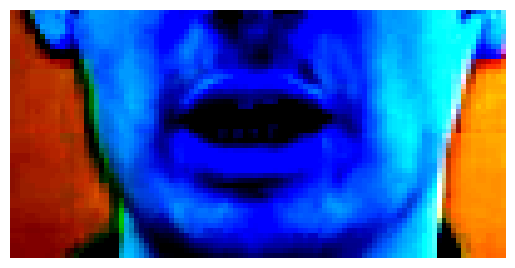

In [33]:
plt.imshow(frames[40])
plt.axis('off')

In [10]:
test_frames = []
min_w = 361
min_h = 289
max_w = 0
max_h = 0
for vid_path in vid_paths:
    cap = cv2.VideoCapture(vid_path)
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.flip(frame, 1)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = face_detection.process(frame)
        # Draw bounding boxes on faces
        if results.detections:
            detection = results.detections[0]
            bboxC = detection.location_data.relative_bounding_box
            ih, iw, _ = frame.shape
            x, y, w, h = int(bboxC.xmin*iw), int(bboxC.ymin*ih), int(bboxC.width*iw), int(bboxC.height*ih)
            h = h//2
        if min_w > w:
            min_w = w
            index_w = len(test_frames)
            name_w = vid_path
        if min_h > h:
            min_h = h
            index_h = len(test_frames)
            name_h = vid_path
        if max_w < w:
            max_w = w
        if max_h < h:
            max_h = h
    cap.release()
len(test_frames)

0

In [11]:
print(min_w, max_w, min_h, max_h)

110 141 55 70


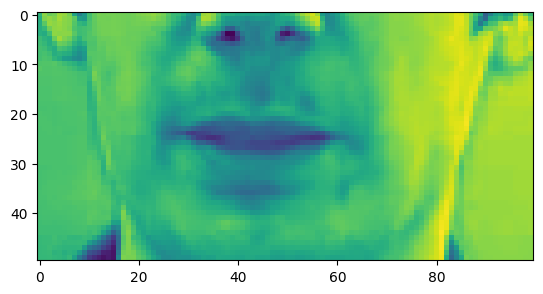

In [22]:
plt.imshow(s1_frames[4][1])

In [ ]:
# plt.imshow(test_frames[1])
fig, axes = plt.subplots(15, 5, figsize=(12, 40))

# Loop through the images and plot them
for i in range(len(test_frames)):
    # Read the image using OpenCV (replace with your image loading code)
    plt.subplot(15,5,i+1)

    # Convert BGR to RGB (if needed)
    image = test_frames[i]
    
    # Display the image
    plt.imshow(image)
    
    # Remove axis labels and ticks
    plt.axis("off")

# Adjust layout to prevent clipping of axis labels
plt.tight_layout()

In [ ]:
# plt.imshow(test_frames[1])
fig, axes = plt.subplots(15, 5, figsize=(12, 40))

# Loop through the images and plot them
for i in range(len(s1_frames[0])):
    # Read the image using OpenCV (replace with your image loading code)
    plt.subplot(15,5,i+1)

    # Convert BGR to RGB (if needed)
    image = s1_frames[4][i]
    
    # Display the image
    plt.imshow(image)
    
    # Remove axis labels and ticks
    plt.axis("off")

# Adjust layout to prevent clipping of axis labels
plt.tight_layout()

Load alignments

In [2]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz "]

In [35]:
len(vocab)

27

In [36]:
def load_chars_from_file(file_path):
    chars = []
    with open(file_path, 'r') as file:
        lines = file.readlines()[1:-1]
        for line in lines:
            start, end, word = line.strip().split(' ')
            chars.extend(list(word))
            chars.append(" ")
        chars.pop()
    return chars

In [41]:
aligns = []
for file_path in align_paths:
    if file_path == 'D:\\Code\\Python\\LipReading\\data\\alignments\\s1\\pbio7a.align'or file_path == 'D:\\Code\\Python\\LipReading\\data\\alignments\\s1\\bbizzn.align':
        continue
    chars = load_chars_from_file(file_path)
    aligns.append(chars)

In [42]:
flat = [item for sublist in aligns for item in sublist]

# Convert the 1D array into a set
all_chars = set(flat)

print(sorted(all_chars))

[' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [43]:
len(all_chars)

27

In [44]:
len(aligns)

998

In [4]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="", invert=True)

In [46]:
print(aligns[997])

['s', 'e', 't', ' ', 'w', 'h', 'i', 't', 'e', ' ', 'w', 'i', 't', 'h', ' ', 's', 'p', ' ', 'v', ' ', 'n', 'i', 'n', 'e', ' ', 'a', 'g', 'a', 'i', 'n']


In [62]:
align_paths[999]

'D:\\Code\\Python\\LipReading\\data\\alignments\\s1\\swwv9a.align'

In [47]:
max = 0
for align in aligns:
    if len(align) > max:
        max = len(align)
        index = align
max

31

In [48]:
for align in aligns:
    while len(align) < max:
        align.append("")
len(aligns[0])

31

In [49]:
tokens = []
for align in aligns:
    tokens.append(char_to_num(align))
tokens = np.array(tokens)

In [53]:
np.save("s1_tokens", tokens)

In [38]:
num_to_char([1,2,3])

<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'a', b'b', b'c'], dtype=object)>

In [5]:
char_to_num(["b","i","n"," ", "b","l","u","e", " ","a","t"," ", "f"," ","t","w", "o"," ","n","o", "w"])

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 27,  2, 12, 21,  5, 27,  1, 20, 27,  6, 27, 20, 23, 15,
       27, 14, 15, 23], dtype=int64)>

In [6]:
len(["b","i","n"," ", "b","l","u","e", " ","a","t"," ", "f"," ","t","w", "o"," ","n","o", "w"])

21